<a href="https://colab.research.google.com/github/YanaErmakova2711/lesson4/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lesson1_demo%22%22%22%22%22%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#установка библиотеки
!pip install psycopg2
!pip install plotly

In [ ]:
#проверка подключения 
import psycopg2
import pandas as pd

#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go

DB_HOST = '52.157.159.24'
DB_USER = 'student4'
DB_USER_PASSWORD = 'student4_password'
DB_NAME = 'sql_ex'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
cur = conn.cursor()
pd.read_sql_query("select min(model), cd from PC where ram<128 and cd='12x' group by cd", conn)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,min,cd
0,1232,12x


In [ ]:
# LESSON5_HOMEWORK

In [ ]:
#--task1 (lesson5)
#-- Компьютерная фирма: Сделать view (pages_all_products), в которой будет постраничная разбивка всех продуктов 
#(не более двух продуктов на одной странице). Вывод: все данные из laptop, номер страницы, список всех страниц

request = """
--CREATE  view pages_all_products AS

SELECT *,(count(*)  over())/2 AS count_pages,  (row_number() over()-1)/2+1 as page

from product join 
( 
select model, price from pc 
union all 
select model, price from laptop 
union all 
select model, price from printer 
) 
as res1
on product.model=res1.model
LIMIT 2 OFFSET 0
"""
pd.read_sql_query(request, conn)

,maker,model,type,model,price,count_pages,page
0,A,1232,PC,1232,600.0,12,1
1,B,1121,PC,1121,850.0,12,1


In [ ]:
#--task2 (lesson5) 

#-- Компьютерная фирма: Сделать view (distribution_by_type), в рамках которого будет процентное соотношение всех
#товаров по типу устройства. Вывод: производитель, 


request = """

--CREATE view distribution_by_type AS

SELECT type as tp, count(type)*100/(SELECT count(*)
from product join 
( 
select model, price from pc 
union all 
select model, price from laptop 
union all 
select model, price from printer 
) as res1
on product.model=res1.model) as res2


from product join 
( 
select model, price from pc 
union all 
select model, price from laptop 
union all 
select model, price from printer 
) as res3
on product.model=res3.model
group by type

"""
pd.read_sql_query(request, conn)


,tp,res2
0,PC,50
1,Printer,25
2,Laptop,25


In [ ]:
#--task3 (lesson5)
#-- Компьютерная фирма: Сделать на базе предыдущенр view график - круговую диаграмму

df = pd.read_sql_query(request, conn)

labels = df.tp.to_list()
values = df.res2.to_list()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
df.tp.to_list()

['PC', 'Printer', 'Laptop']

In [ ]:
df.res2.to_list()

[50, 25, 25]

In [ ]:
#--task4 (lesson5)
#-- Корабли: Сделать копию таблицы ships (ships_two_words), но у название корабля должно состоять из двух слов
request = """
--CREATE TABLE ships_two_words AS
SELECT * from ships
WHERE name LIKE '% %'

"""
pd.read_sql_query(request, conn)

,name,class,launched
0,New Jersey,Iowa,1943
1,North Carolina,North Carolina,1941
2,Royal Oak,Revenge,1916
3,Royal Sovereign,Revenge,1916
4,South Dakota,North Carolina,1941


In [ ]:
#--task5 (lesson5)
#-- Корабли: Вывести список кораблей, у которых class отсутствует (IS NULL) и название начинается с буквы "S"
request = """

SELECT res1.name, class from ships right join
(SELECT name  from ships 
union all
SELECT ship  from outcomes)as res1 on res1.name=ships.name 

WHERE res1.name LIKE 'S%' 
and  class is null 

"""
pd.read_sql_query(request, conn)

,name,class
0,Schamhorst,None


In [ ]:
#--task6 (lesson5)
#-- Компьютерная фирма: Вывести все принтеры производителя = 'A' 
#со стоимостью выше средней по принтерам производителя = 'D' и три самых дорогих (через оконные функции). Вывести model
# СДЕЛАЕМ  ПО СРЕДНЕЙ СТОИМОСТИ ПО ПРОИЗВОДИТЕЛЮ  D ТАК КАК ПРОИЗВОДИТЕЛЯ C ПРИНТЕРОВ НЕ СУЩЕСТВУЕТ
 
request = """



SELECT product.model
from product join 
( 
select model, price from printer 
) as res1
on product.model=res1.model

where maker='A' and price> (SELECT AVG(PRICE)
from product join 
( 
select model, price from printer 
) as res1
on product.model=res1.model
where maker='D' 
group by maker)



"""
pd.read_sql_query(request, conn)





,model
0,1276


In [ ]:
#ДОРЕШЕНЫ  ЗАДАЧИ 7,9,10,11,13,16

In [ ]:
# LESSON4_HOMEWORK 

In [ ]:
#--task13 (lesson3)
#--Компьютерная фирма: Вывести список всех продуктов и производителя с указанием типа продукта 
#(pc, printer, laptop). Вывести: model, maker, type

request = """


SELECT maker, type, res.model from (select model from pc 
union all
select model from printer 
union all
select model from laptop) as res join product on res.model=product.model


"""
pd.read_sql_query(request, conn)

,maker,type,model
0,A,PC,1232
1,B,PC,1121
2,A,PC,1233
3,B,PC,1121
4,B,PC,1121
5,A,PC,1233
6,A,PC,1232
7,A,PC,1232
8,A,PC,1232
9,E,PC,1260


In [ ]:
#--task14 (lesson3)
#--Компьютерная фирма: При выводе всех значений из таблицы printer дополнительно вывести для тех, 
#   у кого цена вышей средней PC - "1", у остальных - "0"
request = """
select price,model, case
            when price>(select avg(price) from printer )
            then 1
            else 0
         end  flag
from printer    
"""
pd.read_sql_query(request, conn)


,price,model,flag
0,400.0,1276,1
1,270.0,1433,0
2,290.0,1434,0
3,150.0,1401,0
4,270.0,1408,0
5,400.0,1288,1


In [ ]:
#--task15 (lesson3)
#--Корабли: Вывести список кораблей, у которых class отсутствует (IS NULL)
request = """
SELECT * from ships
where class is null

"""
pd.read_sql_query(request, conn)

,name,class,launched


In [ ]:
#--task16 (lesson3)
#--Корабли: Укажите сражения, которые произошли в годы, не совпадающие ни с одним из годов спуска кораблей на воду.
request = """
SELECT battle FROM 
(
SELECT *  from ships   join outcomes on ships.name=outcomes.ship
)
as res1 
join 
(
SELECT *, EXTRACT(YEAR FROM date) as YEAR from battles
) 
as res2  
 on res2.name=res1.battle 
where year != launched


"""
pd.read_sql_query(request, conn)



,battle
0,Surigao Strait
1,Guadalcanal
2,Guadalcanal
3,Surigao Strait
4,Guadalcanal
5,Guadalcanal


In [ ]:
#--task17 (lesson3)
#-Корабли: Найдите сражения, в которых участвовали корабли класса Kongo из таблицы Ships.
#участвуют таблицы ships, outcomes
request = """

SELECT name, class, battle  from ships   join outcomes on ships.name=outcomes.ship
where class= 'Kongo'
"""
pd.read_sql_query(request, conn)


,name,class,battle
0,Kirishima,Kongo,Guadalcanal


In [ ]:
#--task1  (lesson4)
#-- Компьютерная фирма: Сделать view (название all_products_flag_300) для всех товаров (pc, printer, laptop) 
#    с флагом, если стоимость больше > 300. Во view три колонки: model, price, flag

request = """

--create view all_products_flag_300 as 

select model, price, case
    when price > 300  then 1
    else 0
end flag
from 
(
select model, price from pc
union all
select model, price from laptop
union all
select model, price from printer
) as res


"""


pd.read_sql_query(request, conn)


,model,price,flag
0,1232,600.0,1
1,1121,850.0,1
2,1233,600.0,1
3,1121,850.0,1
4,1121,850.0,1
5,1233,950.0,1
6,1232,400.0,1
7,1232,350.0,1
8,1232,350.0,1
9,1260,350.0,1


In [ ]:
#--task2  (lesson4)
#-- Компьютерная фирма: Сделать view (название all_products_flag_avg_price) для всех товаров (pc, printer, laptop)
#    с флагом, если стоимость больше cредней . Во view три колонки: model, price, flag

request = """

--create view all_products_flag_avg_price as 

select model, price, case
    when price > (select avg(price) 
from 
(
select model, price from pc
union all
select model, price from laptop
union all
select model, price from printer
) as res
)
   
    
    then 1  
    else 0
end flag
from 
(
select model, price from pc
union all
select model, price from laptop
union all
select model, price from printer
) as res1


"""


pd.read_sql_query(request, conn)

,model,price,flag
0,1232,600.0,0
1,1121,850.0,1
2,1233,600.0,0
3,1121,850.0,1
4,1121,850.0,1
5,1233,950.0,1
6,1232,400.0,0
7,1232,350.0,0
8,1232,350.0,0
9,1260,350.0,0


In [ ]:
#--task3  (lesson4)
#-- Компьютерная фирма: Вывести все принтеры производителя = 'A' 
#    со стоимостью выше средней по принтерам производителя = 'D' и 'C'. Вывести model
request = """



select product.model from product join printer on product.model=printer.model
where maker='A' and price> (select avg(price) from product join printer on product.model=printer.model
where maker='D' and maker='C')
  

"""


pd.read_sql_query(request, conn)
# Производитель  принтеров 'C' отсутствует

,model


In [ ]:
#--task4 (lesson4)
#-- Компьютерная фирма: Вывести все товары производителя = 'A' 
#    со стоимостью выше средней по принтерам производителя = 'D' и 'C'. Вывести model
request = """

select * from product join
(
select model, price from pc
union all
select model, price from laptop
union all
select model, price from printer
)as res
on product.model=res.model
where maker='A' 
and price>
(
select avg(price) from product 
join printer on product.model=printer.model
where maker='D' 
and maker='C'
)


"""
pd.read_sql_query(request, conn)

# Производитель  принтеров 'C' отсутствует

,maker,model,type,model,price


In [ ]:
#--task5 (lesson4)
#-- Компьютерная фирма: Какая средняя цена среди уникальных продуктов производителя = 'A' (printer & laptop & pc)

request = """
select avg(price) from
(
SELECT DISTINCT product.model, price from  product join
(
select model, price from pc
union all
select model, price from laptop
union all
select model, price from printer
) as res 
on product.model=res.model
where maker='A'
) as res1

"""
pd.read_sql_query(request, conn)


,avg
0,680.0


In [ ]:
#--task6 (lesson4)
#-- Компьютерная фирма: Сделать view с количеством товаров (название count_products_by_makers) 
#по каждому производителю. Во view: maker, count
request = """
--create view count_products_by_makers as
SELECT  maker, count(product.model) as cnt from  product join
(
select model, price from pc
union all
select model, price from laptop
union all
select model, price from printer
) as res
on product.model=res.model group by maker

"""
pd.read_sql_query(request, conn)


,maker,cnt
0,E,2
1,D,2
2,A,15
3,C,1
4,B,4


In [ ]:
#--task7 (lesson4)
#-- По предыдущему view (count_products_by_makers) сделать график в colab (X: maker, y: count)

df = pd.read_sql_query(request, conn)
fig = px.bar(x=df.maker.to_list(), y=df.cnt.to_list(), labels={'x':'maker', 'y':'cnt'})
fig.show()

In [ ]:
#--task8 (lesson4)
#-- Компьютерная фирма: Сделать копию таблицы printer (название printer_updated) и удалить из нее все принтеры производителя 'D'
request = """

--CREATE TABLE printer_updated AS

select maker, product.model, product.type as pro_type, code, 
printer.type as pritype, price  from product join printer 
on product.model=printer.model 
where maker !='D'


"""


pd.read_sql_query(request, conn)



,maker,model,pro_type,code,pritype,price
0,A,1276,Printer,1,Laser,400.0
1,E,1434,Printer,3,Jet,290.0
2,A,1401,Printer,4,Matrix,150.0
3,A,1408,Printer,5,Matrix,270.0


In [ ]:
#--task9 (lesson4)
#-- Компьютерная фирма: Сделать на базе таблицы (printer_updated) view с дополнительной колонкой производителя
#    (название printer_updated_with_makers)
request = """

--CREATE TABLE printer_updated_with_makers AS

select maker, product.model, product.type as pro_type, code, 
printer.type as pritype, price, maker as maker1 from product join printer 
on product.model=printer.model 
where maker !='D'


"""


pd.read_sql_query(request, conn)

,maker,model,pro_type,code,pritype,price,maker1
0,A,1276,Printer,1,Laser,400.0,A
1,E,1434,Printer,3,Jet,290.0,E
2,A,1401,Printer,4,Matrix,150.0,A
3,A,1408,Printer,5,Matrix,270.0,A


In [ ]:




#--task10 (lesson4)
#-- Корабли: Сделать view c количеством потопленных кораблей и классом корабля (название sunk_ships_by_classes). 
#Во view: count, class (если значения класса нет/IS NULL, то заменить на 0)

request = """

--CREATE  view sunk_ships_by_classes as 
SELECT count(ship) as count1, res1.class1 from
(
SELECT ship, battle, result, CASE 
 WHEN class IS NULL 
 THEN '0'
 ELSE "class"
 END  class1
 from outcomes left join ships 
on outcomes.ship=ships.name
where result='sunk'
) as res1
 group by res1.class1

"""
pd.read_sql_query(request, conn)





,count1,class1
0,5,0
1,1,Kongo


In [ ]:
#--task11 (lesson4)
#-- Корабли: По предыдущему view (sunk_ships_by_classes) сделать график в colab (X: class, Y: count)

request = """

--CREATE  view sunk_ships_by_classes as 
SELECT count(ship) as count1, res1.class1 from
(
SELECT ship, battle, result, CASE 
 WHEN class IS NULL 
 THEN 0
 ELSE 1
 END  class1
 from outcomes left join ships 
on outcomes.ship=ships.name
where result='sunk'
) as res1
 group by res1.class1

"""
pd.read_sql_query(request, conn)


pd.read_sql_query(request, conn)
df = pd.read_sql_query(request, conn)
fig = px.bar(x=df.class1.to_list(), y=df.count1.to_list(), labels={'x':'class 0-класса нет, 1- класс есть', 'y':'count'})
fig.show()



In [ ]:
#--task12 (lesson4)
#-- Корабли: Сделать копию таблицы classes (название classes_with_flag) и добавить в нее flag: 
#если количество орудий больше или равно 9 - то 1, иначе 0
request = """

--CREATE TABLE classes_with_flag AS

select *, case
    when numguns >= 9
    then 1
    else 0
end flag
from classes

"""


pd.read_sql_query(request, conn)


,class,type,country,numguns,bore,displacement,flag
0,Bismarck,bb,Germany,8,15.0,42000,0
1,Iowa,bb,USA,9,16.0,46000,1
2,Kongo,bc,Japan,8,14.0,32000,0
3,North Carolina,bb,USA,12,16.0,37000,1
4,Renown,bc,Gt.Britain,6,15.0,32000,0
5,Revenge,bb,Gt.Britain,8,15.0,29000,0
6,Tennessee,bb,USA,12,14.0,32000,1
7,Yamato,bb,Japan,9,18.0,65000,1


In [ ]:
#--task13 (lesson4)
#-- Корабли: Сделать график в colab по таблице classes с количеством классов по странам (X: country, Y: count)
request = """
SELECT country, count(class) as cnt from classes 
group by country



"""
pd.read_sql_query(request, conn)
df = pd.read_sql_query(request, conn)
fig = px.bar(x=df.country.to_list(), y=df.cnt.to_list(), labels={'x':'country', 'y':'cnt'})
fig.show()

In [ ]:
#--task14 (lesson4)
#-- Корабли: Вернуть количество кораблей, у которых название начинается с буквы "O" или "M".

request = """
SELECT * from ships 
WHERE name LIKE 'M%' or name LIKE 'O%'


"""
pd.read_sql_query(request, conn)
 



,name,class,launched
0,Missouri,Iowa,1944
1,Musashi,Yamato,1942


In [ ]:
#--task15 (lesson4)
#-- Корабли: Вернуть количество кораблей, у которых название состоит из двух слов.

request = """
SELECT * from ships 
WHERE name LIKE '% %'

"""
pd.read_sql_query(request, conn)


,name,class,launched
0,New Jersey,Iowa,1943
1,North Carolina,North Carolina,1941
2,Royal Oak,Revenge,1916
3,Royal Sovereign,Revenge,1916
4,South Dakota,North Carolina,1941


In [ ]:
#--task16 (lesson4)
#-- Корабли: Построить график с количеством запущенных на воду кораблей и годом запуска (X: year, Y: count)
request = """
SELECT launched as year, count (name) as cnt from ships
group by launched
"""
pd.read_sql_query(request, conn)
df = pd.read_sql_query(request, conn)
fig = px.bar(x=df.year.to_list(), y=df.cnt.to_list(), labels={'x':'year', 'y':'cnt'})
fig.show()

In [ ]:
# LESSON4_HOMEWORK

In [ ]:
pd.read_sql_query(request, conn)


In [ ]:
# LESSON3_HOMEWORK

In [ ]:
# --task1
# --Корабли: Для каждого класса определите число кораблей этого класса, потопленных в сражениях. 
#Вывести: класс и число потопленных кораблей.
request = """
SELECT count(ship), result  from outcomes group by result
"""
pd.read_sql_query(request, conn)


,count,result
0,6,sunk
1,7,OK
2,3,damaged


In [ ]:
# --task2
# --Корабли: Для каждого класса определите год, когда был спущен на воду первый корабль этого класса. 
#Если год спуска на воду головного корабля неизвестен, определите минимальный год спуска на воду кораблей этого класса. 
#Вывести: класс, год.
request = """
SELECT min(launched) as min_year, class FROM ships  group by class 

"""
pd.read_sql_query(request, conn)

,min_year,class
0,1920,Tennessee
1,1916,Revenge
2,1941,Yamato
3,1913,Kongo
4,1916,Renown
5,1941,North Carolina
6,1943,Iowa


In [ ]:
# --task3
# --Корабли: Для классов, имеющих потери в виде потопленных кораблей и не менее 3 кораблей в базе данных, 
#вывести имя класса и число потопленных кораблей.
request = """
select class, count(class) as count 
from 
(SELECT ship, result,class FROM ships  right join outcomes  on ships.name=outcomes.ship where result='sunk' and class in 
(SELECT  class FROM ships  group by class having count(name)>=3)) as res group by class
"""
pd.read_sql_query(request, conn)

,class,count
0,Kongo,1


In [ ]:
# --task4
# --Корабли: Найдите названия кораблей, имеющих наибольшее число орудий среди всех кораблей такого же водоизмещения 
#(учесть корабли из таблицы Outcomes).
request = """

SELECT  name from (SELECT * FROM classes join  ships  on ships.class=classes.class)as res1
right join (SELECT max(numguns), displacement from (SELECT * FROM classes join  ships  on ships.class=classes.class)as res 
group by displacement) as res2 
on res1.displacement=res2.displacement
and res1.numguns=res2.max



--SELECT max(numguns), displacement from (SELECT * FROM classes join  ships  on ships.class=classes.class)as res 
--group by displacement 
"""
pd.read_sql_query(request, conn)

,name
0,California
1,Iowa
2,Missouri
3,Musashi
4,New Jersey
5,North Carolina
6,Ramillies
7,Revenge
8,Royal Oak
9,Royal Sovereign


In [ ]:
# --task5
# --Компьютерная фирма: Найдите производителей принтеров, которые производят ПК 
#с наименьшим объемом RAM и с самым быстрым процессором среди всех ПК, имеющих наименьший объем RAM. Вывести: Maker

# В расчете участвуют таблицы product и pc(min(ram) and max(speed))

request = """
SELECT maker,type from product where type='PC'
"""
pd.read_sql_query(request, conn)

,maker,type
0,B,PC
1,A,PC
2,A,PC
3,E,PC
4,E,PC
5,E,PC
6,E,PC
7,E,PC
8,E,PC
9,E_updated,PC


In [ ]:
pd.read_sql_query("select * from PC ", conn)

,code,model,speed,ram,hd,cd,price
0,1,1232,500,64,5.0,12x,600.0
1,2,1121,750,128,14.0,40x,850.0
2,3,1233,500,64,5.0,12x,600.0
3,4,1121,600,128,14.0,40x,850.0
4,5,1121,600,128,8.0,40x,850.0
5,6,1233,750,128,20.0,50x,950.0
6,7,1232,500,32,10.0,12x,400.0
7,8,1232,450,64,8.0,24x,350.0
8,9,1232,450,32,10.0,24x,350.0
9,10,1260,500,32,10.0,12x,350.0


Схема БД состоит из четырех таблиц:



*   Product(maker, model, type)
*   PC(code, model, speed, ram, hd, cd, price)
*   Laptop(code, model, speed, ram, hd, price, screen)
*   Printer(code, model, color, type, price)


Таблица Product представляет производителя (maker), номер модели (model) и тип ('PC' - ПК, 'Laptop' - ПК-блокнот или 'Printer' - принтер). Предполагается, что номера моделей в таблице Product уникальны для всех производителей и типов продуктов. В таблице PC для каждого ПК, однозначно определяемого уникальным кодом – code, указаны модель – model (внешний ключ к таблице Product), скорость - speed (процессора в мегагерцах), объем памяти - ram (в мегабайтах), размер диска - hd (в гигабайтах), скорость считывающего устройства - cd (например, '4x') и цена - price. Таблица Laptop аналогична таблице РС за исключением того, что вместо скорости CD содержит размер экрана -screen (в дюймах). В таблице Printer для каждой модели принтера указывается, является ли он цветным - color ('y', если цветной), тип принтера - type (лазерный – 'Laser', струйный – 'Jet' или матричный – 'Matrix') и цена - price.

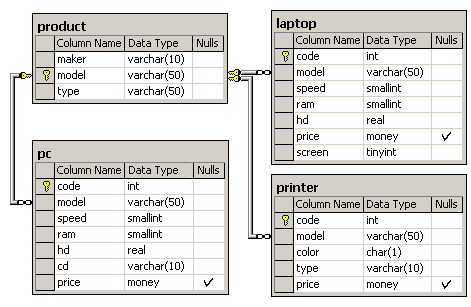


In [ ]:
pd.read_sql_query("select * from PC", conn)

,code,model,speed,ram,hd,cd,price
0,1,1232,500,64,5.0,12x,600.0
1,2,1121,750,128,14.0,40x,850.0
2,3,1233,500,64,5.0,12x,600.0
3,4,1121,600,128,14.0,40x,850.0
4,5,1121,600,128,8.0,40x,850.0
5,6,1233,750,128,20.0,50x,950.0
6,7,1232,500,32,10.0,12x,400.0
7,8,1232,450,64,8.0,24x,350.0
8,9,1232,450,32,10.0,24x,350.0
9,10,1260,500,32,10.0,12x,350.0


In [ ]:
cur.execute("""
insert into Product values('E','product_by_student_0','PC');
""")

pd.read_sql_query("select * from Product where model = 'product_by_student_0'", conn)

,maker,model,type
0,E,product_by_student_0,PC
